# Pet Project. US Fed Interest Rate Forecasting Using Regression Analysis and Modeling

In today's world, where economic variables are subject to constant fluctuations, the ability to anticipate changes in the financial environment is key to making informed decisions. In Pet Project, we present a study aimed at predicting the U.S. Federal Reserve (Fed) interest rate using regression analysis and modeling techniques.

Our approach involves not only the construction of regression models, but also an in-depth analysis of the factors affecting the interest rate. We look at aspects such as federal debt, inflation, unemployment rate, dollar index, oil price, GDP and other key indicators of the U.S. economy.

In our research process, we also pay attention to multicollinearity techniques, robustness checks, and residual analysis to ensure the accuracy and validity of our models. The results of this project will not only provide an interest rate forecast, but will also help us understand the factors that significantly influence the Fed's financial decisions.

**Work performed by: Artyom Gavryushin**

### Variable Definition, units of measure Unit of measure (quarterly figures)

`y` - U.S. Federal Reserve interest rate

`x1` - Federal Debt: Total government debt million $ (Per capita in thousands of $)

`x2` - Commercial and industrial loans, All commercial banks $ million (Per capita in thousands of $)

`x3` - U.S. inflation rate (%)

`x4` - Unemployment rate (%)

`x5` - Dollar Index ($)

`x6` - Oil Price ($)

`x7` - U.S. GDP milll. $ (Per capita in thousands of $)

`x8` - Federal budget surplus or deficit ($millions) $millions (Per capita in thousands of $)

`x9` - University of Michigan: consumer sentiment %

`x10` - Net percent of domestic banks reporting increased demand for commercial and industrial loans from small firms %

`x11` - S&P500 price index ($)

In [39]:
|import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [40]:
initial_matrix = pd.read_excel('matrix_file.xlsx')
initial_matrix = initial_matrix.set_index('Year. Quartal')
initial_matrix.head(10)

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
Year. Quartal,,,,,,,,,,,,
2010 1 quarter,0.5,41.293250,-68.4,2.361000,9.833333,93.158967,73.793333,0.047731,-0.001060,73.866667,-29.6,1115.930000
2010 2 quarter,0.5,42.679061,28.0,1.770000,9.633333,94.743433,73.493333,0.048428,-0.000933,73.933333,-9.3,1102.270000
2010 3 quarter,0.5,43.842328,-18.0,1.175667,9.466667,93.633167,71.556667,0.048950,-0.000933,68.300000,-3.6,1097.376667
2010 4 quarter,0.5,45.341042,-12.3,1.270333,9.500000,90.640700,79.733333,0.049493,-0.001194,71.266667,-21.4,1207.150000
2011 1 quarter,0.5,45.798686,-19.2,2.140667,9.033333,89.331700,90.513333,0.049269,-0.001482,73.066667,5.6,1313.056667
2011 2 quarter,0.5,46.032886,-20.0,3.430667,9.066667,86.936333,102.853333,0.049931,-0.000455,71.866667,9.6,1343.150000
2011 3 quarter,0.5,47.468306,-14.7,3.756000,9.000000,87.647133,92.346667,0.050220,-0.001048,59.666667,5.8,1214.196667
2011 4 quarter,0.5,48.856698,-7.8,3.293667,8.633333,91.360100,97.056667,0.050844,-0.001027,64.800000,-18.8,1252.620000
2012 1 quarter,0.5,49.721659,-13.5,2.815667,8.266667,90.706000,102.150000,0.051195,-0.001456,75.500000,15.1,1362.186667


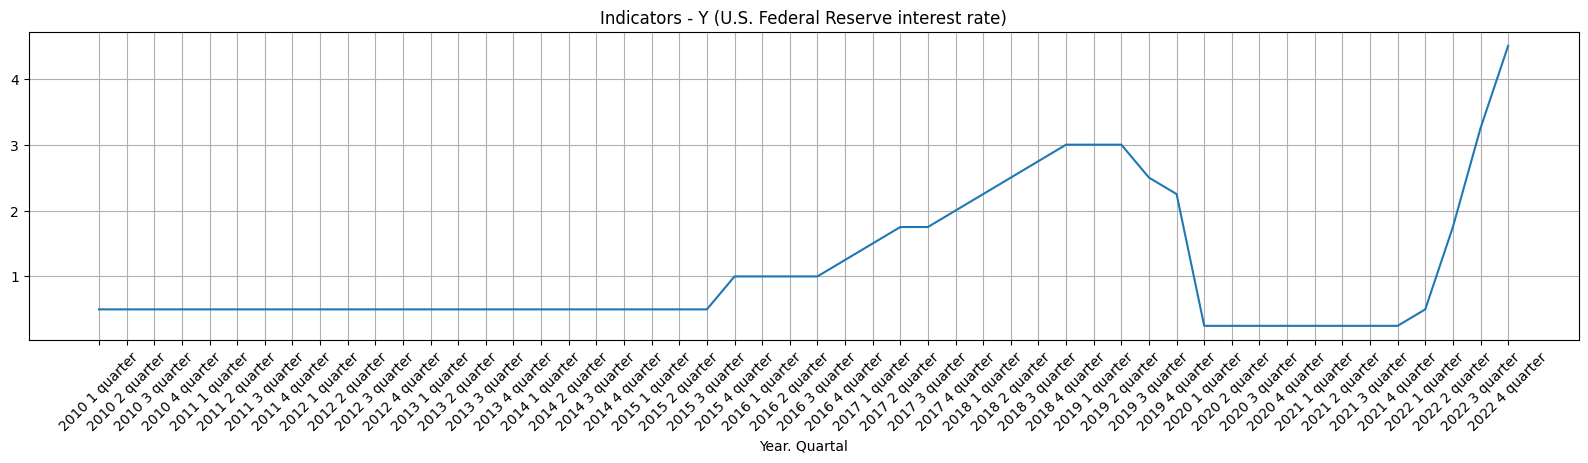

In [41]:
fig, ax = plt.subplots(figsize=(20,4))
plt.plot(initial_matrix['Y'])
plt.xlabel("Year. Quartal")
plt.xticks(rotation=45)
plt.title(f'Indicators - Y (U.S. Federal Reserve interest rate)')
plt.grid()
plt.show()

You can see from the chart that after a long period from 2010 Q1 to 2015 Q3, the interest rate remained unchanged at 0.5%. Due to the deteriorating economic condition, the US had to raise the interest rate to a rate of 3% in 2018 Q4, but then began to soften with the arrival of the coronavirus infection in 2020. The US Fed then started to raise the interest rate in order to curb the rise in inflation. Price increases for consumer goods and services accelerated significantly in 2021, leading to a build-up of inflationary pressures.

--------

***Let's take a look at the correlation matrix and regression analysis on the original matrix.***

In [42]:
initial_matrix.corr()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
Y,1.000000,0.332646,0.237693,0.292387,-0.628270,0.538214,-0.134615,0.505884,0.097673,0.240504,-0.125478,0.317758
x1,0.332646,1.000000,0.158842,0.619820,-0.505372,0.816662,-0.221216,0.963000,-0.440440,-0.135371,-0.150728,0.975545
x2,0.237693,0.158842,1.000000,0.064058,-0.410044,0.202827,-0.022119,0.225905,0.102347,0.155158,0.324818,0.134792
x3,0.292387,0.619820,0.064058,1.000000,-0.312393,0.295008,0.452875,0.662025,-0.192426,-0.588454,0.169420,0.604665
x4,-0.628270,-0.505372,-0.410044,-0.312393,1.000000,-0.655145,0.257393,-0.686532,-0.333875,-0.477529,-0.042902,-0.571926
x5,0.538214,0.816662,0.202827,0.295008,-0.655145,1.000000,-0.635001,0.845123,-0.295494,0.285430,-0.286445,0.807814
x6,-0.134615,-0.221216,-0.022119,0.452875,0.257393,-0.635001,1.000000,-0.195616,0.151091,-0.633803,0.485127,-0.246304
x7,0.505884,0.963000,0.225905,0.662025,-0.686532,0.845123,-0.195616,1.000000,-0.269544,-0.037578,-0.119025,0.962851
x8,0.097673,-0.440440,0.102347,-0.192426,-0.333875,-0.295494,0.151091,-0.269544,1.000000,0.352445,0.121429,-0.360407
x9,0.240504,-0.135371,0.155158,-0.588454,-0.477529,0.285430,-0.633803,-0.037578,0.352445,1.000000,-0.089314,-0.032367


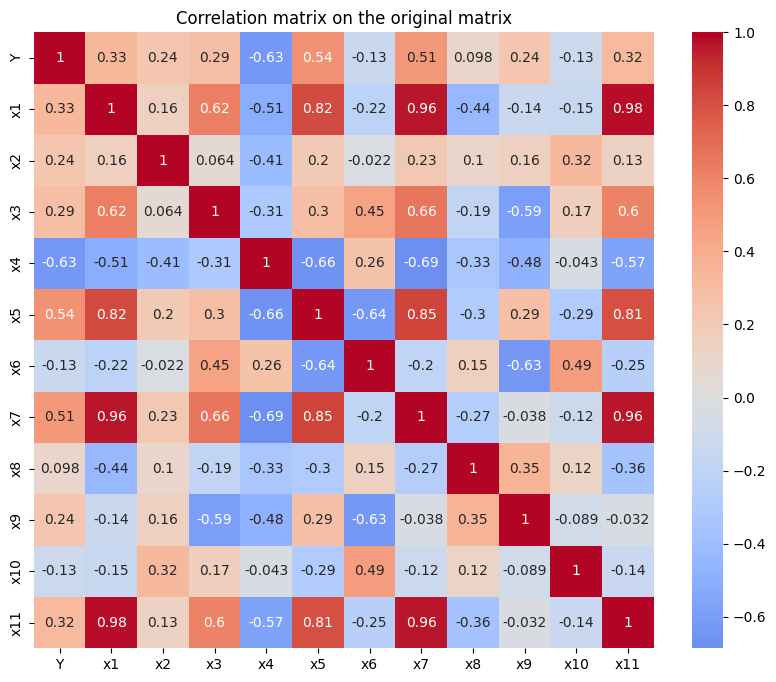

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(initial_matrix.corr(), annot = True, fmt='.2g', center= 0, cmap= 'coolwarm')
plt.title('Correlation matrix on the original matrix')
plt.show()

**We can draw the following conclusions:**

1. U.S. GDP and Federal Debt (High correlation: 0.96):
- **Explanation**: The correlation between GDP and Federal Debt can be high because an increase in GDP can be accompanied by an increase in government spending. Government spending can be financed by borrowing, which leads to an increase in government debt. Thus, changes in GDP and Federal Debt may be correlated through government fiscal policy.

2. S&P500 Price Index and Federal Debt (High correlation: 0.98):

- **Explanation**: The high correlation between the S&P500 Price Index and Federal Debt may be due to the fact that changes in financial markets can influence the government's borrowing decisions. For example, increased confidence in the market may increase borrowing, while economic instability may reduce activity in financial markets and reduce borrowing.

3. U.S. GDP and the S&P500 Price Index (High correlation: 0.96):
- **Explanation**: The correlation between GDP and the S&P500 Price Index can be high due to the fact that a healthy economy is usually accompanied by an increase in securities and stocks. An increase in GDP may indicate that the economy is growing and, as a result, the companies in the S&P500 Index are growing.

In [44]:
y_fed = initial_matrix['Y']
x_without_fed = initial_matrix.copy()
x_without_fed = x_without_fed.drop(columns='Y')

x_without_fed = sm.add_constant(x_without_fed)
model = sm.OLS(y_fed, x_without_fed).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     16.70
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.17e-11
Time:                        00:40:52   Log-Likelihood:                -29.528
No. Observations:                  52   AIC:                             83.06
Df Residuals:                      40   BIC:                             106.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.2951      4.361     -6.489      0.0

The R^2 value of 0.821 indicates that our model successfully captures patterns in the data and fits them well. BUT! According to the above graph we can conclude that it is impossible to describe this model due to the unpredictability of the interest rate and its dynamics over 12 years of data. Thus, we replace the explanatory variable with "S&P500 Index" and further analysis will be carried out with it.

# Pet Project - #01. S&P500 price index Forecasting Using Regression Analysis and Modeling

In [45]:
matrix = initial_matrix.copy()
matrix = matrix.drop(columns='Y')
matrix = matrix.rename(columns={'x11': 'Y'})
matrix = matrix[['Y'] + [x for x in matrix.columns if x != 'Y']]
matrix.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
Year. Quartal,,,,,,,,,,,
2010 1 quarter,1115.930000,41.293250,-68.4,2.361000,9.833333,93.158967,73.793333,0.047731,-0.001060,73.866667,-29.6
2010 2 quarter,1102.270000,42.679061,28.0,1.770000,9.633333,94.743433,73.493333,0.048428,-0.000933,73.933333,-9.3
2010 3 quarter,1097.376667,43.842328,-18.0,1.175667,9.466667,93.633167,71.556667,0.048950,-0.000933,68.300000,-3.6
2010 4 quarter,1207.150000,45.341042,-12.3,1.270333,9.500000,90.640700,79.733333,0.049493,-0.001194,71.266667,-21.4
2011 1 quarter,1313.056667,45.798686,-19.2,2.140667,9.033333,89.331700,90.513333,0.049269,-0.001482,73.066667,5.6


Let's perform a quick descriptive statistic on the data, and check the fullness of the matrix.

In [46]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 2010 1 quarter to 2022 4 quarter
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       52 non-null     float64
 1   x1      52 non-null     float64
 2   x2      52 non-null     float64
 3   x3      52 non-null     float64
 4   x4      52 non-null     float64
 5   x5      52 non-null     float64
 6   x6      52 non-null     float64
 7   x7      52 non-null     float64
 8   x8      52 non-null     float64
 9   x9      52 non-null     float64
 10  x10     52 non-null     float64
dtypes: float64(11)
memory usage: 6.9+ KB


In [47]:
matrix.isnull().sum()

Y      0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
dtype: int64

In [48]:
matrix.describe()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2405.178526,63.199334,-1.925000,2.435744,6.101282,105.781702,68.848301,0.059350,-0.000968,82.546154,-0.834615
std,992.480510,14.570097,15.885903,2.031989,2.247933,11.369472,23.070426,0.007980,0.000986,12.494062,14.169214
min,1097.376667,41.293250,-68.400000,-0.062667,3.566667,86.936333,24.495000,0.047731,-0.006027,56.100000,-45.500000
25%,1590.479167,52.959210,-6.825000,1.264583,4.133333,93.514617,51.514167,0.052781,-0.001155,74.033333,-9.500000
50%,2128.990000,60.288520,-1.050000,1.889667,5.483333,110.759950,66.325000,0.057862,-0.000903,81.616667,0.750000
75%,2931.380833,69.411225,6.225000,2.565250,7.858333,115.080392,92.250000,0.064527,-0.000532,94.291667,7.475000
max,4646.186667,93.615133,28.000000,8.633667,12.966667,124.808467,108.460000,0.078446,0.000387,98.933333,25.000000


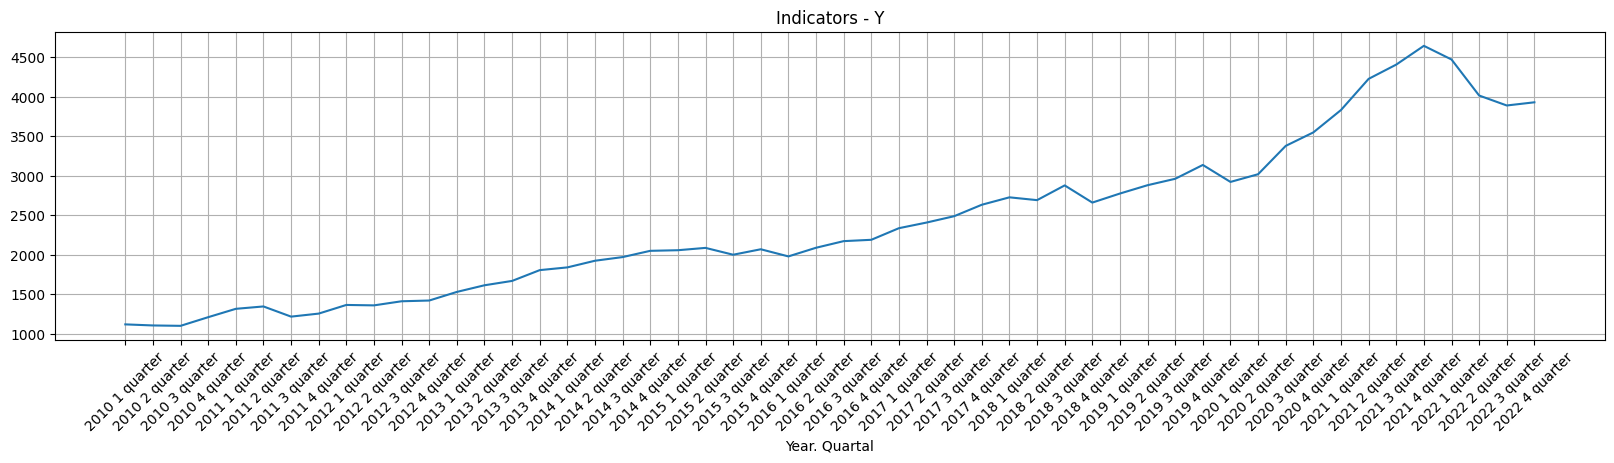

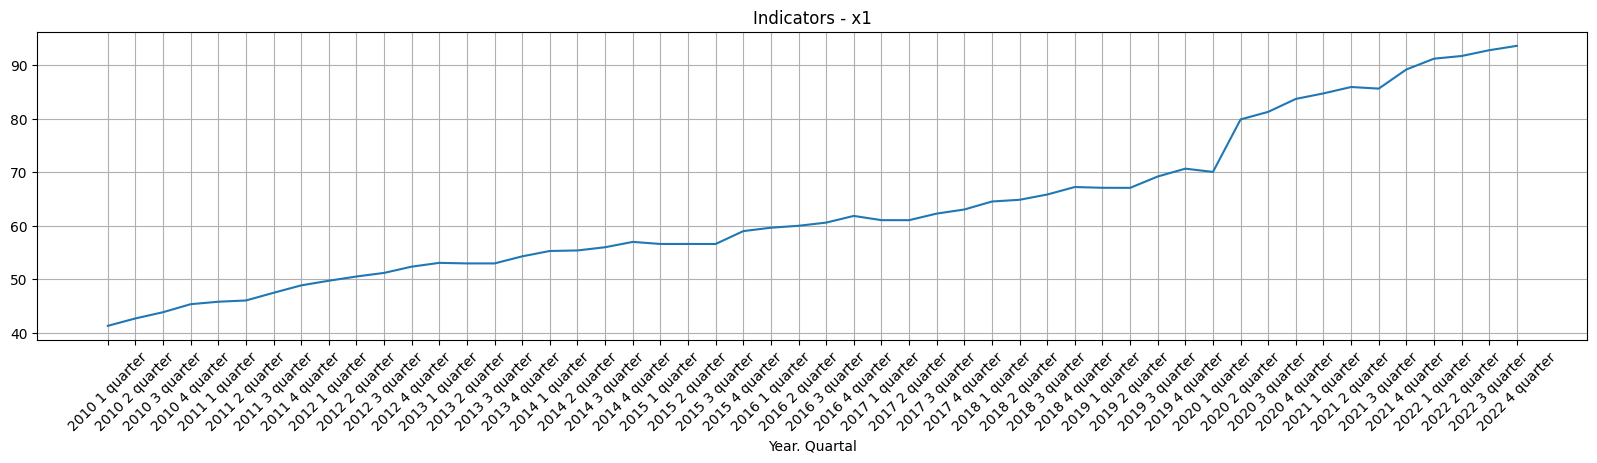

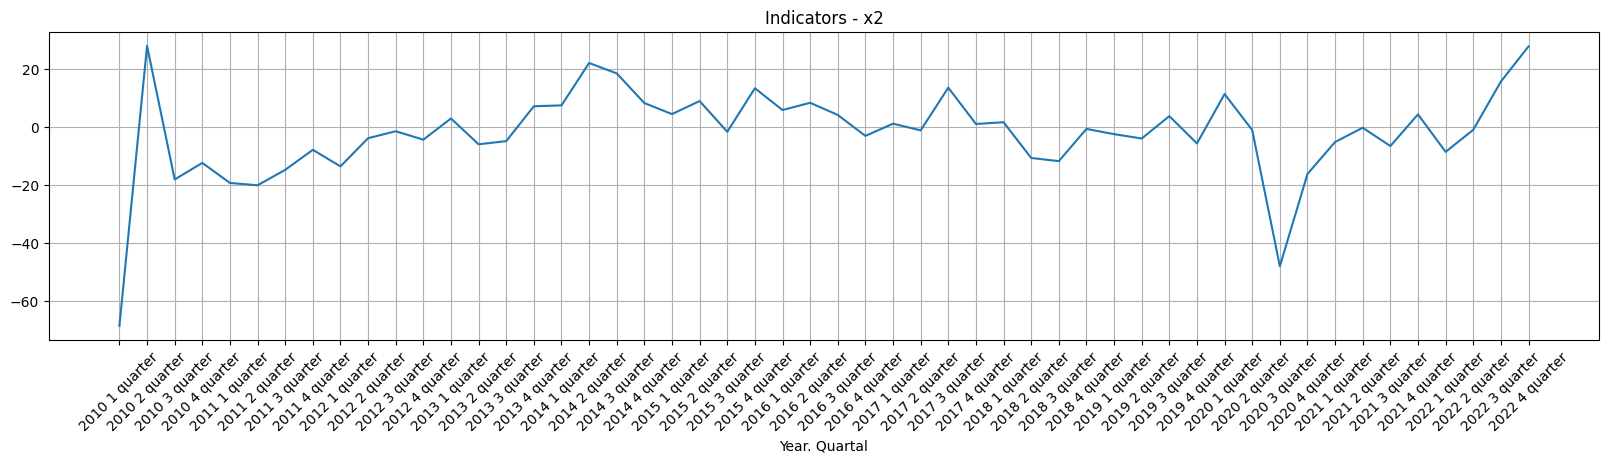

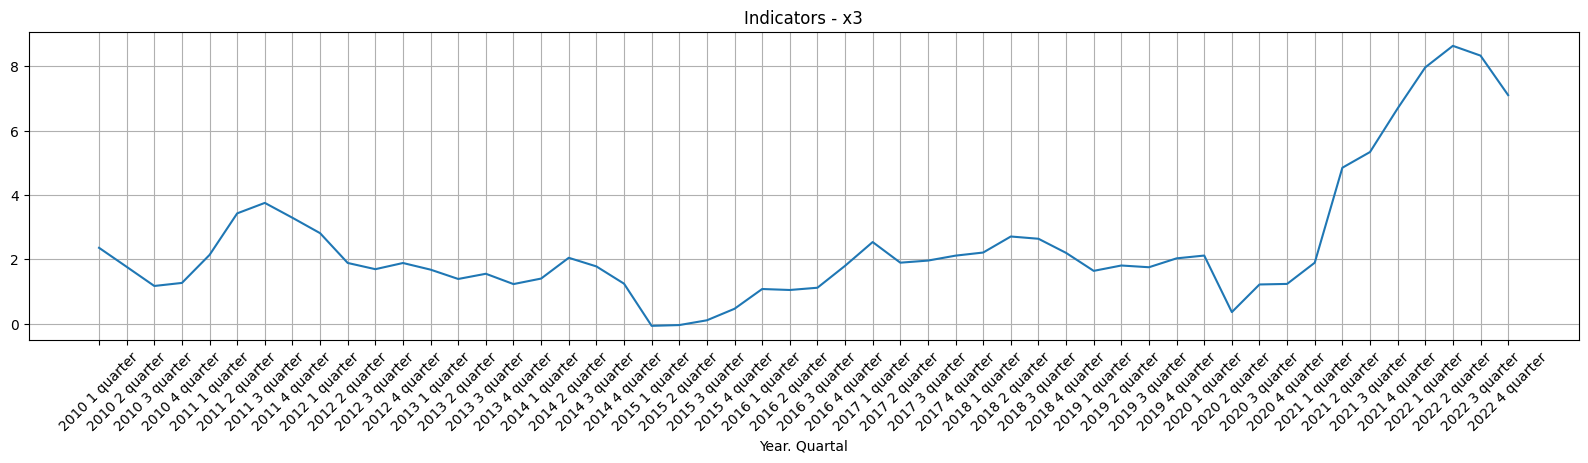

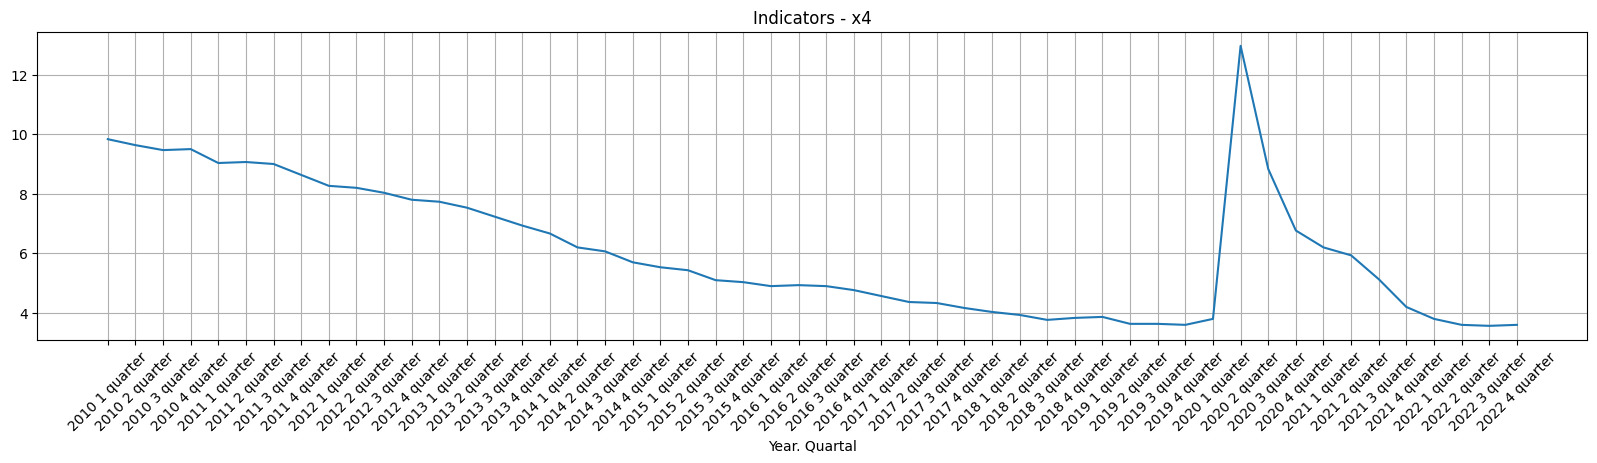

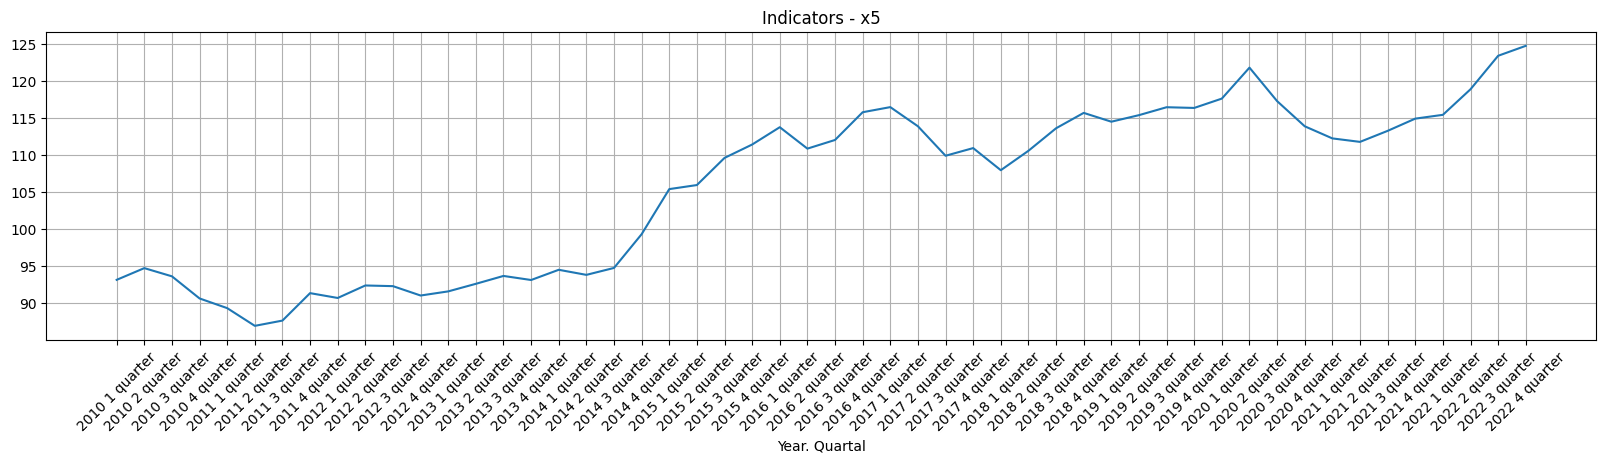

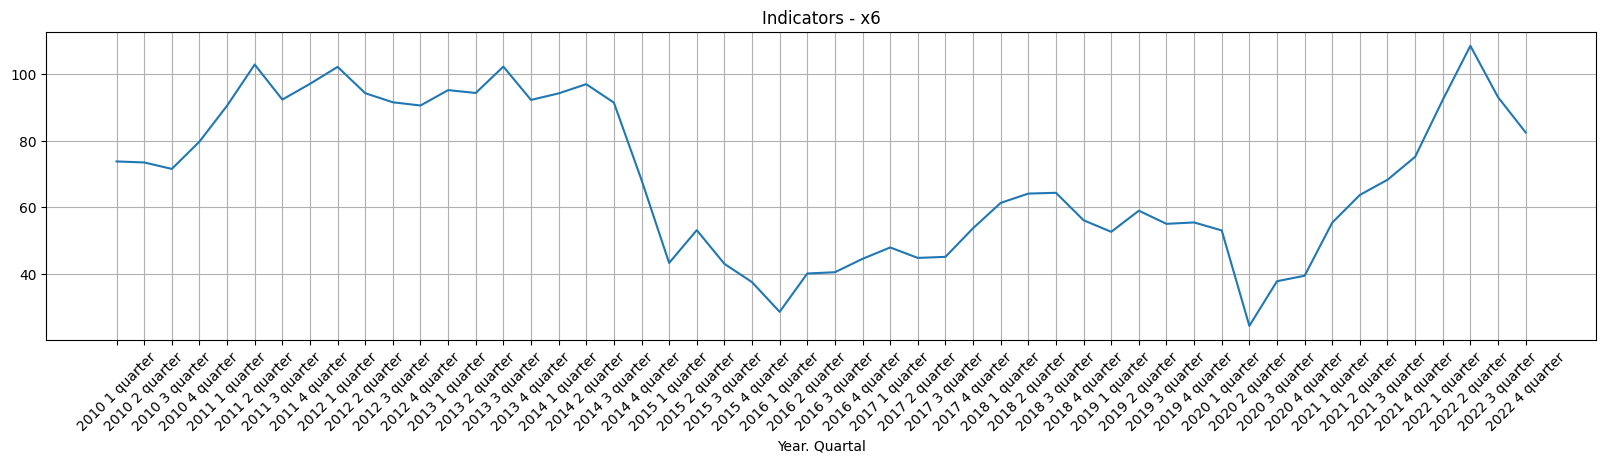

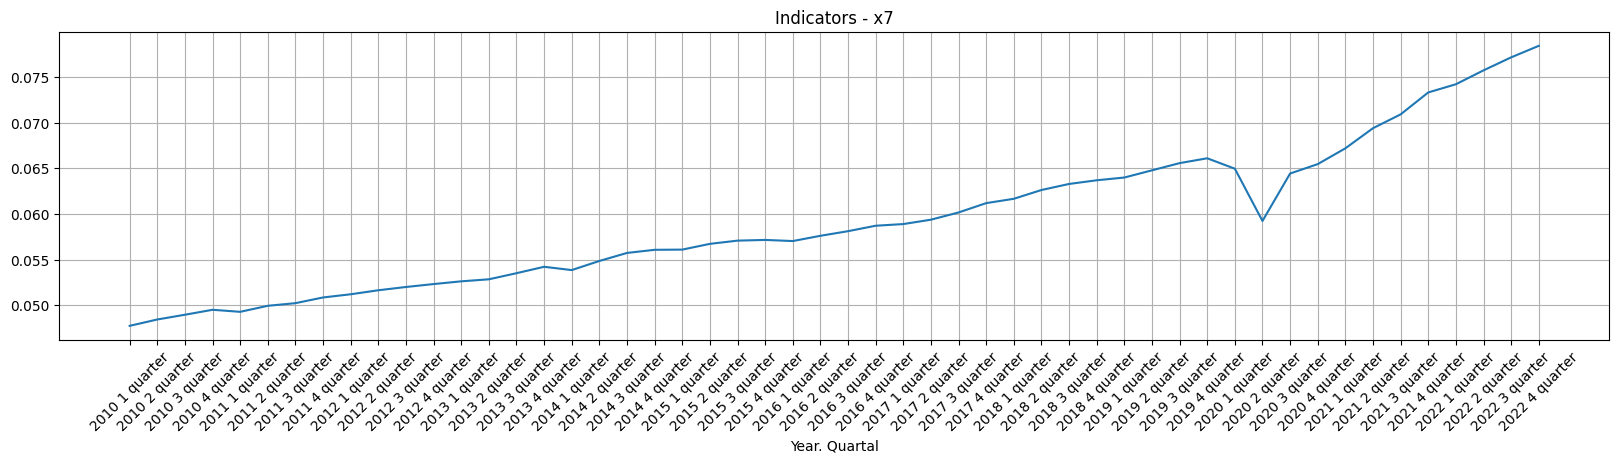

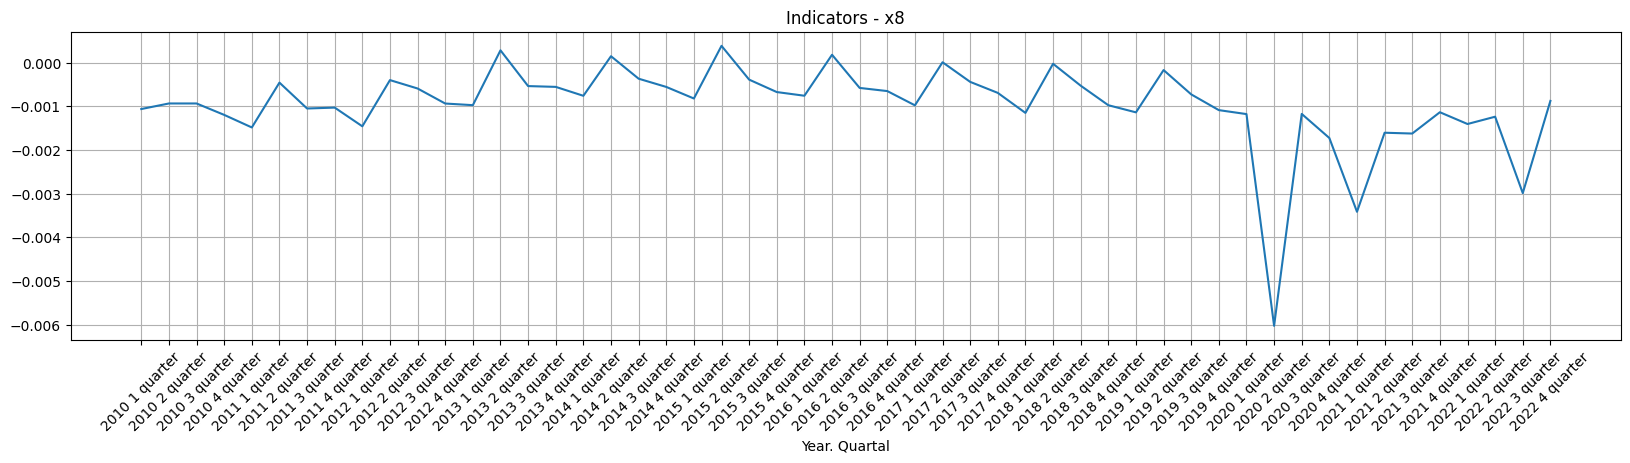

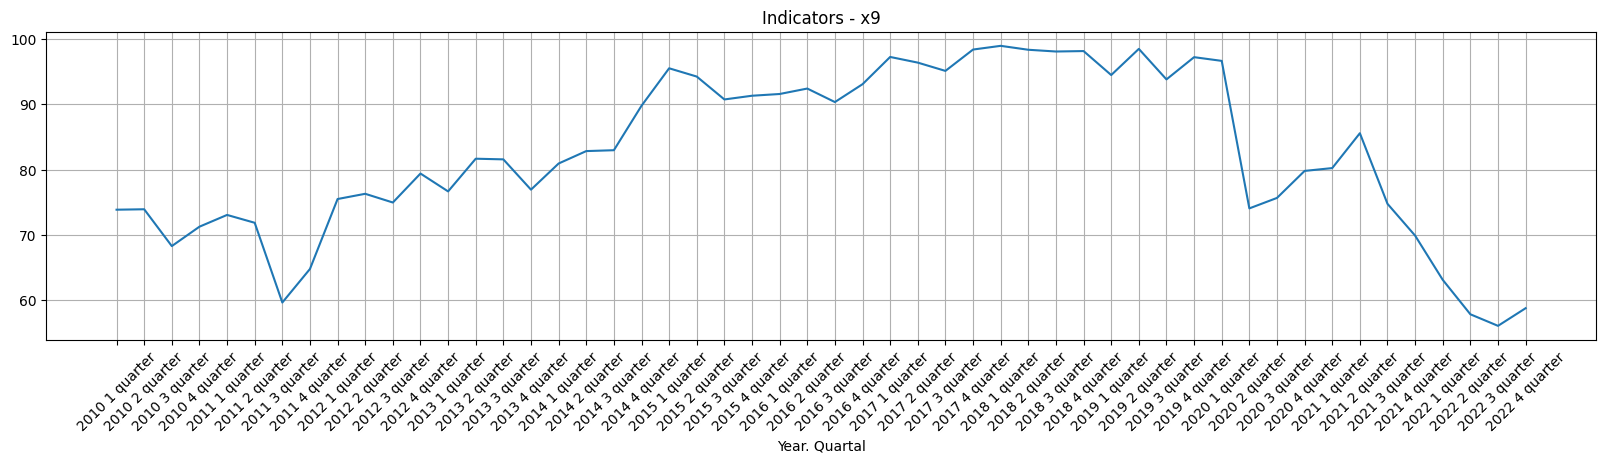

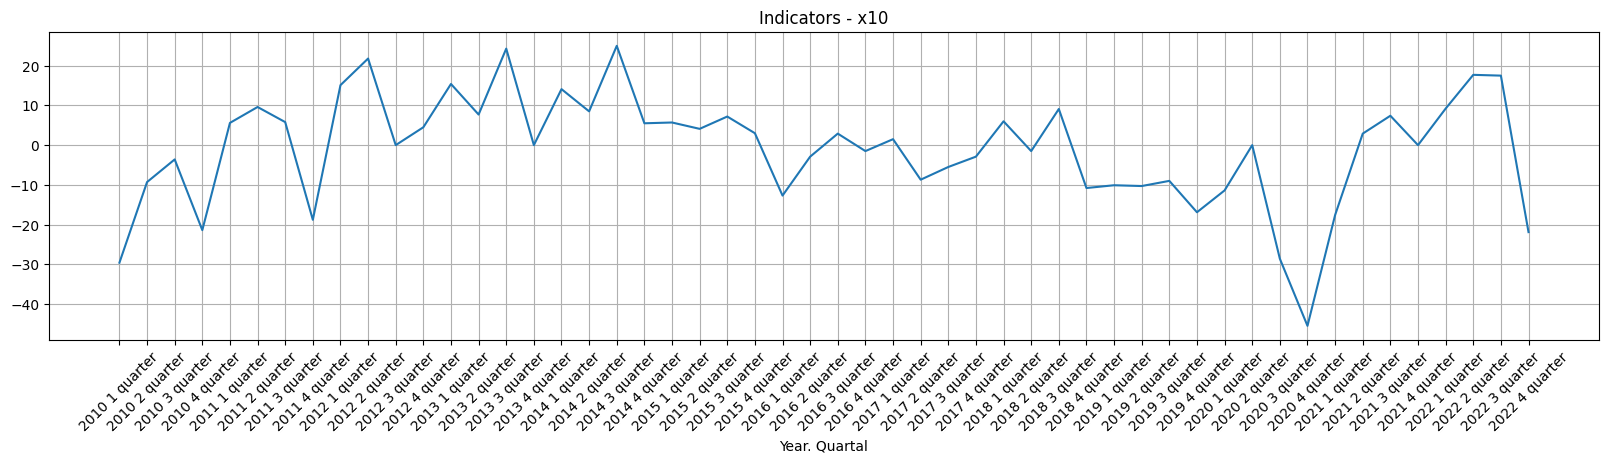

In [49]:
for col in matrix:
  fig, ax = plt.subplots(figsize=(20,4))
  plt.plot(matrix[col])
  plt.xlabel("Year. Quartal")
  plt.xticks(rotation=45)
  plt.title(f'Indicators - {col}')
  plt.grid()
  plt.show()

It can be seen that the S&P500 index is constantly rising, but there are also short-term downturns caused by various economic events. Of note is the strong growth that began in the second quarter of 2020 and continued until the fourth quarter of 2021. This growth was associated with the easing of monetary policy accompanied by the massive issuance of unsecured cash into the liquidity of all markets to sustain them during the coronavirus pandemic.

In [50]:
y_sp500 = matrix['Y']
x_without_sp500 = matrix.copy()
x_without_sp500 = x_without_sp500.drop(columns='Y')

x_without_sp500 = sm.add_constant(x_without_sp500)
model = sm.OLS(y_sp500, x_without_sp500).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     280.2
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           2.00e-34
Time:                        00:40:59   Log-Likelihood:                -321.88
No. Observations:                  52   AIC:                             665.8
Df Residuals:                      41   BIC:                             687.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2629.0023   1117.797     -2.352      0.0

Year. Quartal
2010 1 quarter     54.536302
2010 2 quarter    187.102233
2010 3 quarter     84.720684
2010 4 quarter     38.598698
2011 1 quarter     62.903339
dtype: float64


<ipython-input-51-26821dd3ebda>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, hist=True, kde=True, bins=50)


Text(0, 0.5, 'Frequency')

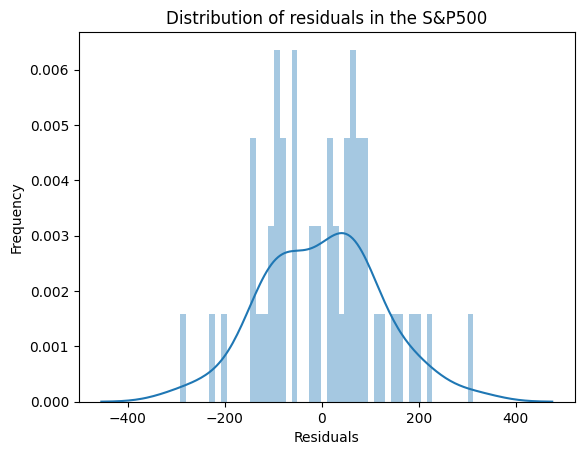

In [51]:
residuals = model.resid
print(residuals[:5])

sns.distplot(residuals, hist=True, kde=True, bins=50)
plt.title('Distribution of residuals in the S&P500')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

We can assume a binomial distribution of our explained variable (S&P500 index)

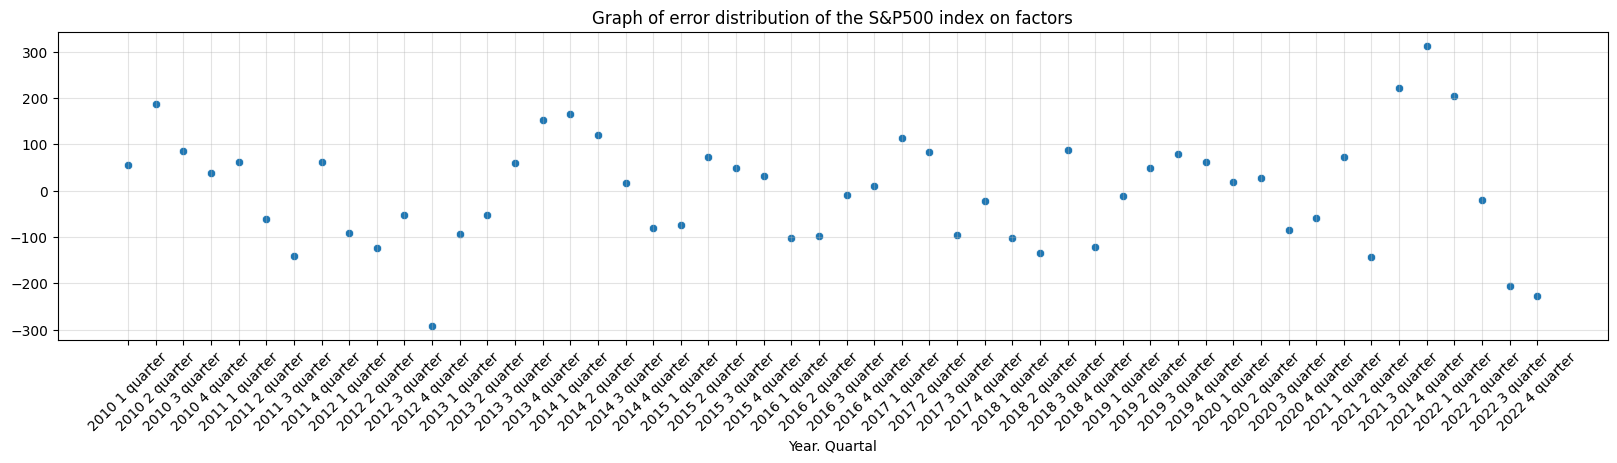

In [52]:
fig, ax = plt.subplots(figsize=(20,4))
sns.scatterplot(data=residuals)
plt.xticks(rotation=45)
plt.title(f'Graph of error distribution of the S&P500 index on factors')
plt.grid(alpha=0.35)
plt.show()

"Strong autocorrelation in the residuals of a regression model" means that the residuals (the difference between the actual and predicted values of the dependent variable) are not random and contain structured patterns. Autocorrelation in the residuals may signal that there is unaccounted dependence left in the model or that there is temporal or spatial structure in the model.

It can be seen that the errors are highly scattered

## Evaluation of correlations between factors.

In [53]:
matrix.corr()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
Y,1.000000,0.975545,0.134792,0.604665,-0.571926,0.807814,-0.246304,0.962851,-0.360407,-0.032367,-0.143010
x1,0.975545,1.000000,0.158842,0.619820,-0.505372,0.816662,-0.221216,0.963000,-0.440440,-0.135371,-0.150728
x2,0.134792,0.158842,1.000000,0.064058,-0.410044,0.202827,-0.022119,0.225905,0.102347,0.155158,0.324818
x3,0.604665,0.619820,0.064058,1.000000,-0.312393,0.295008,0.452875,0.662025,-0.192426,-0.588454,0.169420
x4,-0.571926,-0.505372,-0.410044,-0.312393,1.000000,-0.655145,0.257393,-0.686532,-0.333875,-0.477529,-0.042902
x5,0.807814,0.816662,0.202827,0.295008,-0.655145,1.000000,-0.635001,0.845123,-0.295494,0.285430,-0.286445
x6,-0.246304,-0.221216,-0.022119,0.452875,0.257393,-0.635001,1.000000,-0.195616,0.151091,-0.633803,0.485127
x7,0.962851,0.963000,0.225905,0.662025,-0.686532,0.845123,-0.195616,1.000000,-0.269544,-0.037578,-0.119025
x8,-0.360407,-0.440440,0.102347,-0.192426,-0.333875,-0.295494,0.151091,-0.269544,1.000000,0.352445,0.121429
x9,-0.032367,-0.135371,0.155158,-0.588454,-0.477529,0.285430,-0.633803,-0.037578,0.352445,1.000000,-0.089314


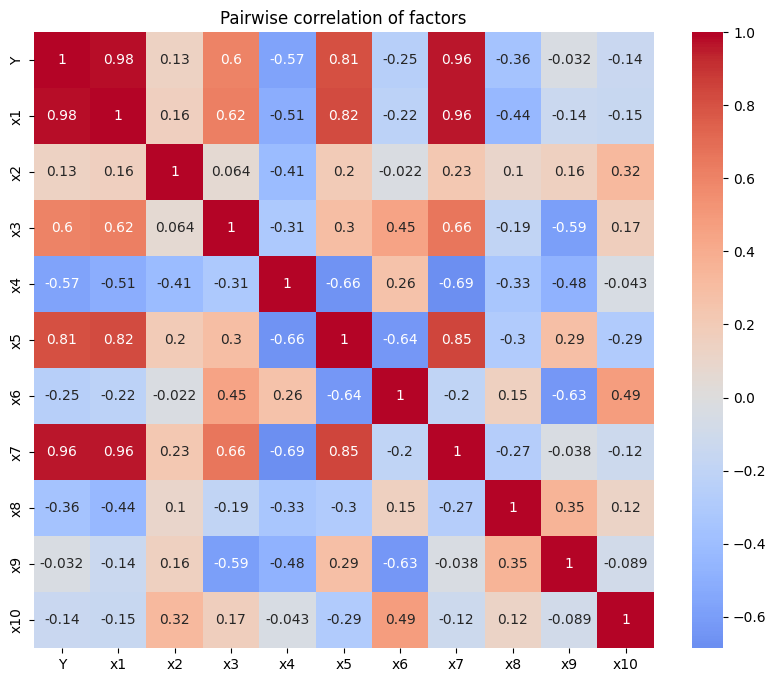

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix.corr(), annot = True, fmt='.2g', center= 0, cmap= 'coolwarm')
plt.title('Pairwise correlation of factors')
plt.show()

The S&P500 has the highest correlation with factor x1 (0.98) and x7 (0.97). This means that the price of the S&P500 is directly correlated with the total U.S. government debt, which is a clear indicator that the money supply is growing and moving into securities such as the S&P500, also, on the other hand, the price of the index is inversely correlated with the unemployment rate, which also means that the higher the unemployment rate, the lower the price of the S&P500.

In [55]:
correlation_matrix = matrix.corr()
fisher_z = 0.5 * np.log((1 + correlation_matrix) / (1 - correlation_matrix))
fisher_z

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
Y,inf,2.195882,0.135618,0.700468,-0.650380,1.120706,-0.251474,1.983608,-0.377354,-0.032379,-0.143997
x1,2.195882,inf,0.160199,0.724713,-0.556495,1.146713,-0.224934,1.985650,-0.472777,-0.136207,-0.151886
x2,0.135618,0.160199,inf,0.064146,-0.435664,0.205679,-0.022123,0.229870,0.102707,0.156421,0.337024
x3,0.700468,0.724713,0.064146,inf,-0.323196,0.304043,0.488311,0.796409,-0.194855,-0.675299,0.171069
x4,-0.650380,-0.556495,-0.435664,-0.323196,inf,-0.784261,0.263314,-0.841366,-0.347183,-0.519778,-0.042928
x5,1.120706,1.146713,0.205679,0.304043,-0.784261,inf,-0.749752,1.238835,-0.304575,0.293584,-0.294690
x6,-0.251474,-0.224934,-0.022123,0.488311,0.263314,-0.749752,inf,-0.198170,0.152257,-0.747747,0.529667
x7,1.983608,1.985650,0.229870,0.796409,-0.841366,1.238835,-0.198170,inf,-0.276372,-0.037596,-0.119592
x8,-0.377354,-0.472777,0.102707,-0.194855,-0.347183,-0.304575,0.152257,-0.276372,inf,0.368233,0.122031
x9,-0.032379,-0.136207,0.156421,-0.675299,-0.519778,0.293584,-0.747747,-0.037596,0.368233,inf,-0.089553


"Fisher upper and lower bounds" are usually related to the confidence interval for a correlation coefficient in statistics. This interval allows us to estimate the range within which, with a certain probability, the true correlation coefficient in the general population may lie.

In [56]:
n = len(matrix)
standard_error_z = 1.96 / np.sqrt(n - 3)
standard_error_z

0.27999999999999997

In [57]:
upper_bound = fisher_z + standard_error_z
lower_bound = fisher_z - standard_error_z

In [58]:
upper_bound

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
Y,inf,2.475882,0.415618,0.980468,-0.370380,1.400706,0.028526,2.263608,-0.097354,0.247621,0.136003
x1,2.475882,inf,0.440199,1.004713,-0.276495,1.426713,0.055066,2.265650,-0.192777,0.143793,0.128114
x2,0.415618,0.440199,inf,0.344146,-0.155664,0.485679,0.257877,0.509870,0.382707,0.436421,0.617024
x3,0.980468,1.004713,0.344146,inf,-0.043196,0.584043,0.768311,1.076409,0.085145,-0.395299,0.451069
x4,-0.370380,-0.276495,-0.155664,-0.043196,inf,-0.504261,0.543314,-0.561366,-0.067183,-0.239778,0.237072
x5,1.400706,1.426713,0.485679,0.584043,-0.504261,inf,-0.469752,1.518835,-0.024575,0.573584,-0.014690
x6,0.028526,0.055066,0.257877,0.768311,0.543314,-0.469752,inf,0.081830,0.432257,-0.467747,0.809667
x7,2.263608,2.265650,0.509870,1.076409,-0.561366,1.518835,0.081830,inf,0.003628,0.242404,0.160408
x8,-0.097354,-0.192777,0.382707,0.085145,-0.067183,-0.024575,0.432257,0.003628,inf,0.648233,0.402031
x9,0.247621,0.143793,0.436421,-0.395299,-0.239778,0.573584,-0.467747,0.242404,0.648233,inf,0.190447


Upper bound on Fisher's Z-transformation

In [59]:
lower_bound

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
Y,inf,1.915882,-0.144382,0.420468,-0.930380,0.840706,-0.531474,1.703608,-0.657354,-0.312379,-0.423997
x1,1.915882,inf,-0.119801,0.444713,-0.836495,0.866713,-0.504934,1.705650,-0.752777,-0.416207,-0.431886
x2,-0.144382,-0.119801,inf,-0.215854,-0.715664,-0.074321,-0.302123,-0.050130,-0.177293,-0.123579,0.057024
x3,0.420468,0.444713,-0.215854,inf,-0.603196,0.024043,0.208311,0.516409,-0.474855,-0.955299,-0.108931
x4,-0.930380,-0.836495,-0.715664,-0.603196,inf,-1.064261,-0.016686,-1.121366,-0.627183,-0.799778,-0.322928
x5,0.840706,0.866713,-0.074321,0.024043,-1.064261,inf,-1.029752,0.958835,-0.584575,0.013584,-0.574690
x6,-0.531474,-0.504934,-0.302123,0.208311,-0.016686,-1.029752,inf,-0.478170,-0.127743,-1.027747,0.249667
x7,1.703608,1.705650,-0.050130,0.516409,-1.121366,0.958835,-0.478170,inf,-0.556372,-0.317596,-0.399592
x8,-0.657354,-0.752777,-0.177293,-0.474855,-0.627183,-0.584575,-0.127743,-0.556372,inf,0.088233,-0.157969
x9,-0.312379,-0.416207,-0.123579,-0.955299,-0.799778,0.013584,-1.027747,-0.317596,0.088233,inf,-0.369553


Lower bound on Fisher's Z-transformation

Thus, with 95% probability, the correlation values are within these bounds.

In [60]:
determination_comparison = pd.DataFrame({
    'Variable': [],
    'R-Squared': [],
    'F-observable': []
})
analysis_matrix = matrix.copy()

for new_y in matrix:
  y = analysis_matrix[new_y]
  x_ = analysis_matrix.copy()
  x_ = x_.drop(columns=new_y)

  x_ = sm.add_constant(x_)
  model = sm.OLS(y, x_).fit()
  r_squared = model.rsquared

  f_obs = (r_squared * (52-10-1))/((1 - r_squared) * 10)

  data = {
      'Variable': new_y,
      'R-Squared': r_squared,
      'F-observable': f_obs
  }

  determination_comparison = determination_comparison.append(data, ignore_index=True)

determination_comparison

<ipython-input-60-1f8ecf23f6ed>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  determination_comparison = determination_comparison.append(data, ignore_index=True)
<ipython-input-60-1f8ecf23f6ed>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  determination_comparison = determination_comparison.append(data, ignore_index=True)
<ipython-input-60-1f8ecf23f6ed>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  determination_comparison = determination_comparison.append(data, ignore_index=True)
<ipython-input-60-1f8ecf23f6ed>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  determination_comparison = determination_comparison.append(data,

,Variable,R-Squared,F-observable
0,Y,0.985577,280.160553
1,x1,0.988127,341.217191
2,x2,0.386922,2.587570
3,x3,0.914116,43.638537
4,x4,0.947410,73.861438
5,x5,0.975686,164.528915
6,x6,0.942262,66.910075
7,x7,0.994159,697.797295
8,x8,0.692360,9.227259
9,x9,0.913730,43.425089


In [61]:
from scipy.stats import f

f_critical = f.ppf(1 - 0.05, 10-1, 52-10-1)

print("F-critical value:", f_critical)

F-critical value: 2.117796875732831


Regression **x7 - US GDP** has the highest determinacy (0.9942), hence this factor can be selected as an explanatory variable.

In [62]:
y_x7 = matrix['x7']
x_without_x7 = matrix.copy()
x_without_x7 = x_without_x7.drop(columns='x7')

x_without_x7 = sm.add_constant(x_without_x7)
model_for_x7 = sm.OLS(y_x7, x_without_x7).fit()

print(model_for_x7.summary())

                            OLS Regression Results                            
Dep. Variable:                     x7   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     697.8
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.86e-42
Time:                        00:41:02   Log-Likelihood:                 311.64
No. Observations:                  52   AIC:                            -601.3
Df Residuals:                      41   BIC:                            -579.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0232      0.005      4.742      0.0

Let's go back to the original matrix, where we have `Y` is the S&P500 index

In [63]:
y_mean = matrix['Y'].mean()

y_sp500 = matrix['Y']
x_without_sp500 = matrix.copy()
x_without_sp500 = x_without_sp500.drop(columns='Y')

x_without_sp500 = sm.add_constant(x_without_sp500)
model = sm.OLS(y_sp500, x_without_sp500).fit()

coefficients = model.params
y_rsquared = model.rsquared
print(coefficients)
print(y_rsquared)

const     -2629.002287
x1           38.941110
x2           -1.917414
x3           95.976566
x4           77.659107
x5          -45.747378
x6          -12.653958
x7       100909.111833
x8         9180.783188
x9           19.315182
x10           2.601307
dtype: float64
0.9855766128670727


We obtained the mean of `Y` as well as the coefficients of the regression model.

**Elasticity coefficients** show by how many percent, on average, a dependent variable will change if the corresponding independent variable changes by 1 percent. `E_c = a_c * x_c / y_mean`

In [64]:
elasticity_coefficients = pd.DataFrame({
    'Elasticity coefficients': [],
    'Value': []
})

indexes_coef = np.array(coefficients.index)

for i, coef in enumerate(coefficients):
  if indexes_coef[i] == 'const':
    index_coef = 'Y'
  else:
    index_coef = indexes_coef[i]

  elastic_coef = (coef * matrix[index_coef].mean()) / y_mean
  data = {
      'Elasticity coefficients': f'EC-{index_coef}',
      'Value': elastic_coef
  }
  elasticity_coefficients = elasticity_coefficients.append(data, ignore_index=True)


elasticity_coefficients

<ipython-input-64-b29f987614dc>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  elasticity_coefficients = elasticity_coefficients.append(data, ignore_index=True)
<ipython-input-64-b29f987614dc>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  elasticity_coefficients = elasticity_coefficients.append(data, ignore_index=True)
<ipython-input-64-b29f987614dc>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  elasticity_coefficients = elasticity_coefficients.append(data, ignore_index=True)
<ipython-input-64-b29f987614dc>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  elasticity_coefficients = elasticity_coefficients.append(data, ignore_

,Elasticity coefficients,Value
0,EC-Y,-2629.002287
1,EC-x1,1.023231
2,EC-x2,0.001535
3,EC-x3,0.097196
4,EC-x4,0.197000
5,EC-x5,-2.012007
6,EC-x6,-0.362220
7,EC-x7,2.490022
8,EC-x8,-0.003696
9,EC-x9,0.662900


We conclude that the most variable factor is x5 (dollar index) and the least variable factor is x7 (US federal budget surplus or deficit).

## Modeling under conditions of multicollinearity of factors

To assess the independence of the explanatory variables, we test the multicollinearity of the factors by three methods: Chi-square, VIF.

Let us hypothesize H0 that |R|=1 and test it using the **Chi-square** statistic with ϑ=1/2 n(n-1) degrees of freedom. The observed value of the statistic is determined by the formula:

 X_calcul^2=n-1-1/6 (2m+5) lg(|R|)

In [65]:
R0 = matrix.corr()
R0 = R0.iloc[1:]
R0 = R0.iloc[:, 1:]
R0

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
x1,1.000000,0.158842,0.619820,-0.505372,0.816662,-0.221216,0.963000,-0.440440,-0.135371,-0.150728
x2,0.158842,1.000000,0.064058,-0.410044,0.202827,-0.022119,0.225905,0.102347,0.155158,0.324818
x3,0.619820,0.064058,1.000000,-0.312393,0.295008,0.452875,0.662025,-0.192426,-0.588454,0.169420
x4,-0.505372,-0.410044,-0.312393,1.000000,-0.655145,0.257393,-0.686532,-0.333875,-0.477529,-0.042902
x5,0.816662,0.202827,0.295008,-0.655145,1.000000,-0.635001,0.845123,-0.295494,0.285430,-0.286445
x6,-0.221216,-0.022119,0.452875,0.257393,-0.635001,1.000000,-0.195616,0.151091,-0.633803,0.485127
x7,0.963000,0.225905,0.662025,-0.686532,0.845123,-0.195616,1.000000,-0.269544,-0.037578,-0.119025
x8,-0.440440,0.102347,-0.192426,-0.333875,-0.295494,0.151091,-0.269544,1.000000,0.352445,0.121429
x9,-0.135371,0.155158,-0.588454,-0.477529,0.285430,-0.633803,-0.037578,0.352445,1.000000,-0.089314
x10,-0.150728,0.324818,0.169420,-0.042902,-0.286445,0.485127,-0.119025,0.121429,-0.089314,1.000000


In [66]:
det_R = np.linalg.det(R0)
print("The determinant of the matrix:", det_R)

The determinant of the matrix: 1.7509890278916952e-06


In [67]:
chi_square_calculated = 52 - 1 - (1/6) * (2 * 10 + 5) * np.log10(det_R)
print("Chi square calculated:", chi_square_calculated)

Chi square calculated: 74.98631906374669


In [68]:
from scipy.stats import chi2

chi_square_tabular = chi2.ppf(1 - 0.05, (10 * (10 - 1) / 2))
print("The inverse of the chi-square value of the distribution:", chi_square_tabular)

The inverse of the chi-square value of the distribution: 61.65623337627955


Since chi_calcul^2 > chi_table^2, the hypothesis H0 is rejected, i.e., the explanatory factors are multicollinear

The generally accepted threshold for **VIF (Variance Inflation Factor)** as a signal of multicollinearity problems is often set at 10. However, this is not a rigid rule.

The following is generally accepted:

- VIF < 5: Low multicollinearity. No major problems.
- 5 < VIF < 10: Moderate multicollinearity. The model may require careful analysis, but in most cases this is an acceptable level.
- VIF > 10: High multicollinearity. Correction such as exclusion or pooling of variables may be required.

VIF (variance inflation factor) coefficients show how strongly the regressors of the model are related to each other and are calculated by the formula:  

VIF_j = 1/(1-R^2_j)

In [69]:
VIF_table = pd.DataFrame({
    'Variable': [],
    'VIF value': []
})

for index, R_SQUARED in enumerate(determination_comparison['R-Squared']):
  if index == 0:
    continue

  vif = 1 / (1 - R_SQUARED)
  data = {
      'Variable': f'{indexes_coef[index]}',
      'VIF value': vif
  }
  VIF_table = VIF_table.append(data, ignore_index=True)

VIF_table

<ipython-input-69-4b511d717d49>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  VIF_table = VIF_table.append(data, ignore_index=True)
<ipython-input-69-4b511d717d49>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  VIF_table = VIF_table.append(data, ignore_index=True)
<ipython-input-69-4b511d717d49>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  VIF_table = VIF_table.append(data, ignore_index=True)
<ipython-input-69-4b511d717d49>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  VIF_table = VIF_table.append(data, ignore_index=True)
<ipython-input-69-4b511d717d49>:15: FutureWarning: The frame.append method is deprecated and will be

,Variable,VIF value
0,x1,84.223705
1,x2,1.631115
2,x3,11.643546
3,x4,19.014985
4,x5,41.129004
5,x6,17.319530
6,x7,171.194462
7,x8,3.250551
8,x9,11.591485
9,x10,2.122601


Variables x1 (84.22), x5 (41.13) and x7 (171. 19) have the highest VIF scores. Therefore, we can conclude that these variables may have strong multicollinearity with other variables.

## Selection of factors in a multiple regression model

We will use the a posteriori method, which involves stepwise removal of factors from the regression model with the most insignificant P-value of the coefficient until only factors with significant regression coefficients remain.

In [70]:
y_sp500 = matrix['Y']
x_without_sp500 = matrix.copy()
x_without_sp500 = x_without_sp500.drop(columns='Y')

x_without_sp500 = sm.add_constant(x_without_sp500)
model = sm.OLS(y_sp500, x_without_sp500).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     280.2
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           2.00e-34
Time:                        00:41:02   Log-Likelihood:                -321.88
No. Observations:                  52   AIC:                             665.8
Df Residuals:                      41   BIC:                             687.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2629.0023   1117.797     -2.352      0.0

The highest P-value is located at `x8` (0.789), so next we will remove this variable from our matrix to further build the regression model and analyze the new P-values.

In [71]:
x_without_sp500 = x_without_sp500.drop(columns='x8')
x_without_sp500 = sm.add_constant(x_without_sp500)
model = sm.OLS(y_sp500, x_without_sp500).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     318.3
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.12e-35
Time:                        00:41:02   Log-Likelihood:                -321.93
No. Observations:                  52   AIC:                             663.9
Df Residuals:                      42   BIC:                             683.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2531.9519   1046.659     -2.419      0.0

The highest P-value is located at `x2` (0.178), so next we will remove this variable from our matrix to further build the regression model and analyze the new P-values.

In [72]:
x_without_sp500 = x_without_sp500.drop(columns='x2')
x_without_sp500 = sm.add_constant(x_without_sp500)
model = sm.OLS(y_sp500, x_without_sp500).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     350.7
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.45e-36
Time:                        00:41:02   Log-Likelihood:                -323.06
No. Observations:                  52   AIC:                             664.1
Df Residuals:                      43   BIC:                             681.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2704.3427   1049.597     -2.577      0.0

The highest P-value is located at `x10` (0.339), so next we will remove this variable from our matrix to further build the regression model and analyze the new P-values.

In [73]:
x_without_sp500 = x_without_sp500.drop(columns='x10')
x_without_sp500 = sm.add_constant(x_without_sp500)
model = sm.OLS(y_sp500, x_without_sp500).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     401.3
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.10e-37
Time:                        00:41:02   Log-Likelihood:                -323.62
No. Observations:                  52   AIC:                             663.2
Df Residuals:                      44   BIC:                             678.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2623.6324   1045.480     -2.509      0.0

Having removed all insignificant factors, we can notice that x4 (0.007), we will make an exception and leave this factor, as its value is not too much different from the norm.

The coefficient of determination is R^2=0.985, that is, the regression equation explains 98.5% of the variance of the resultant sign.

Thus, from the data we can see how the R-squared and standard error changed, that after excluding three factors, the model got better, losing factors such as the U.S. federal budget surplus or deficit, commercial and industrial loans, and the net share of domestic banks that reported an increase in demand for commercial and industrial loans from small firms.

{'whiskers': [<matplotlib.lines.Line2D at 0x7d8b34dc9300>,
 'caps': [<matplotlib.lines.Line2D at 0x7d8b34dc9840>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d8b34dc9060>,
 'medians': [<matplotlib.lines.Line2D at 0x7d8b34dc9d80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d8b34dca020>,
 'means': []}

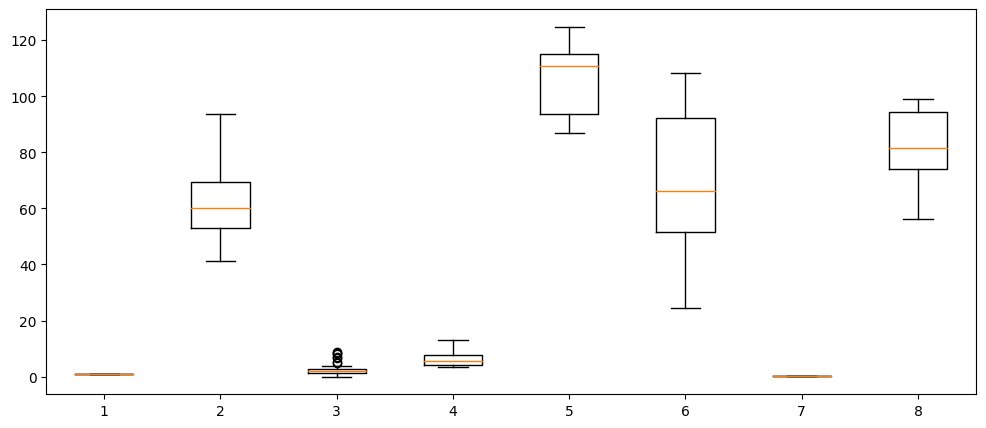

In [120]:
plt.figure(figsize =(12, 5))
plt.boxplot(x_without_sp500)

In [135]:
pip install outlier_utils

In [158]:
from outliers import smirnov_grubbs as grubbs

new_indexes_from_matrix = np.array(x_without_sp500.columns)

for i in new_indexes_from_matrix:
  outlier = grubbs.max_test_outliers(np.array(x_without_sp500[i]), alpha=.05)
  print(f"Outliers in {i}: {outlier}")

Outliers in const: []
Outliers in x1: []
Outliers in x3: [8.633666666666668, 8.33, 7.964333333333333, 7.103000000000001, 6.689, 5.335333333333334, 4.848]
Outliers in x4: [12.966666666666667]
Outliers in x5: []
Outliers in x6: []
Outliers in x7: []
Outliers in x9: []


/usr/local/lib/python3.10/dist-packages/outliers/smirnov_grubbs.py:110: RuntimeWarning: invalid value encountered in double_scalars
  g = value / data.std()


Estimated our matrix and obtained the outliers in our model, where the outliers are in `x3`: [8.633666666666668, 8.33, 7.964333333333333, 7.103000000000001, 6.689, 5.335333333333334, 4.848], `x4`: [12.966666666666667]. Next, let us visually evaluate these graphs.

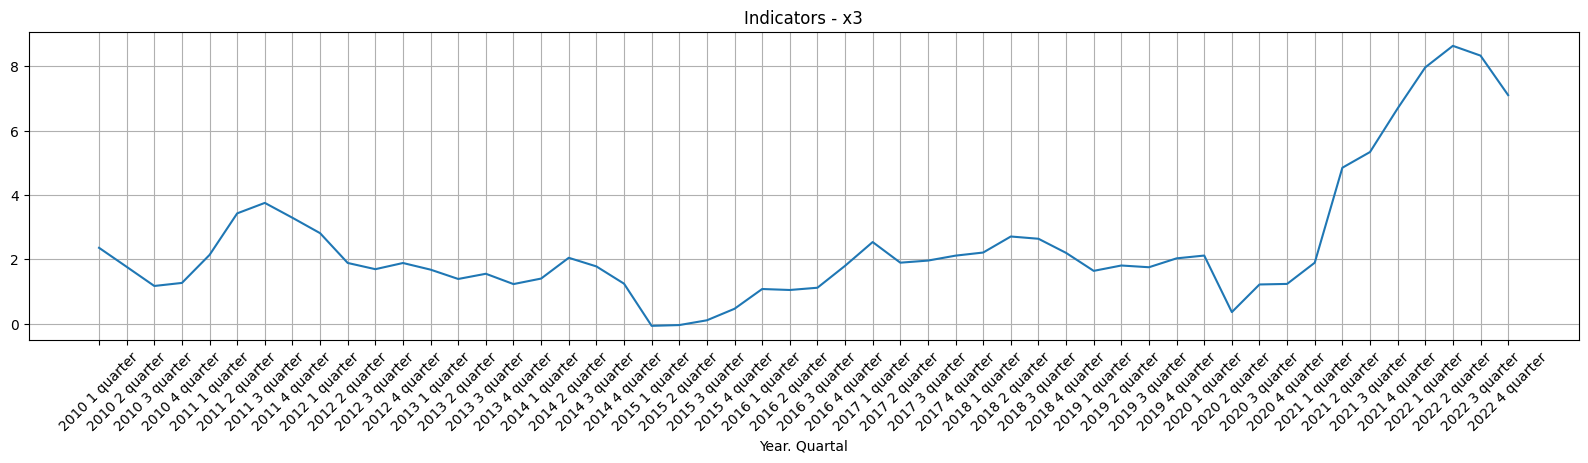

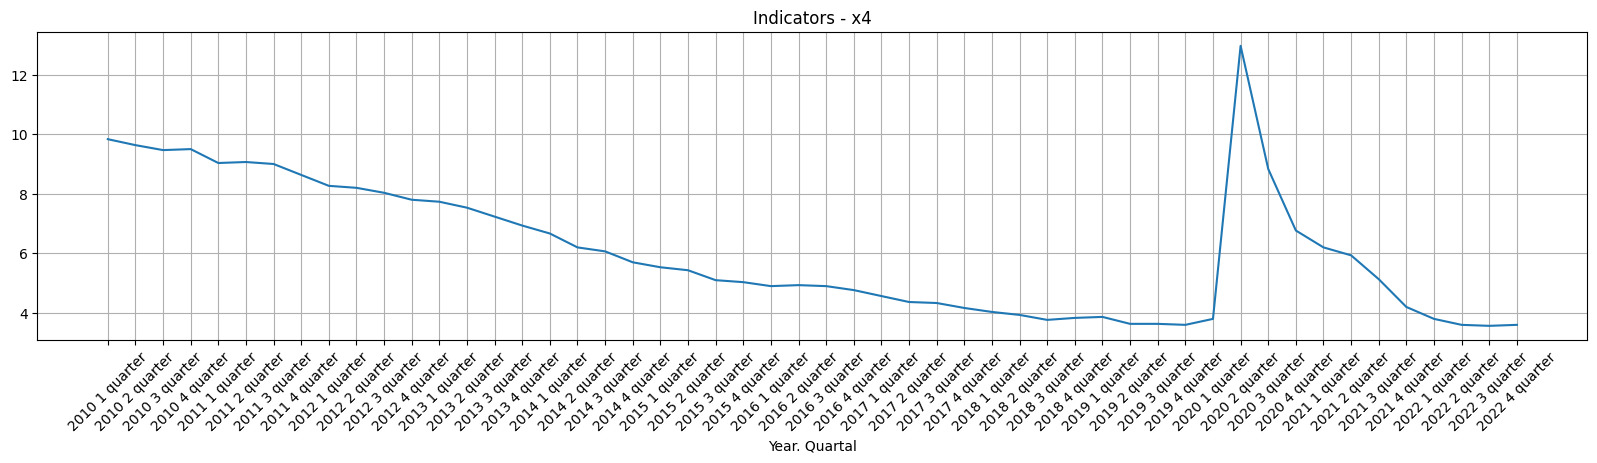

In [161]:
for i in new_indexes_from_matrix:
  if i in ['x3', 'x4']:
    fig, ax = plt.subplots(figsize=(20,4))
    plt.plot(x_without_sp500[i])
    plt.xlabel("Year. Quartal")
    plt.xticks(rotation=45)
    plt.title(f'Indicators - {i}')
    plt.grid()
    plt.show()

In [194]:
def replace_outliers(data, outliers):
    result_data = data.copy()

    for outlier in outliers:
        indices_to_replace = np.where(result_data == outlier)[0]
        result_data[indices_to_replace] = data.mean()

    return result_data

In [195]:
 new_x3 = replace_outliers(x_without_sp500['x3'], [8.633666666666668, 8.33, 7.964333333333333, 7.103000000000001, 6.689, 5.335333333333334, 4.848])
 new_x4 = replace_outliers(x_without_sp500['x4'], [12.966666666666667])

In [199]:
print(grubbs.max_test_outliers(new_x3, alpha=.05))
print(grubbs.max_test_outliers(new_x4, alpha=.05))

[]
[]


Fixed our outliers in the variables, next we will replace them in the original matrix and compute the regression again.

In [200]:
x_without_sp500['x3'] = new_x3
x_without_sp500['x4'] = new_x4
x_without_sp500.head()

,const,x1,x3,x4,x5,x6,x7,x9
Year. Quartal,,,,,,,,
2010 1 quarter,1.0,41.293250,2.361000,9.833333,93.158967,73.793333,0.047731,73.866667
2010 2 quarter,1.0,42.679061,1.770000,9.633333,94.743433,73.493333,0.048428,73.933333
2010 3 quarter,1.0,43.842328,1.175667,9.466667,93.633167,71.556667,0.048950,68.300000
2010 4 quarter,1.0,45.341042,1.270333,9.500000,90.640700,79.733333,0.049493,71.266667
2011 1 quarter,1.0,45.798686,2.140667,9.033333,89.331700,90.513333,0.049269,73.066667


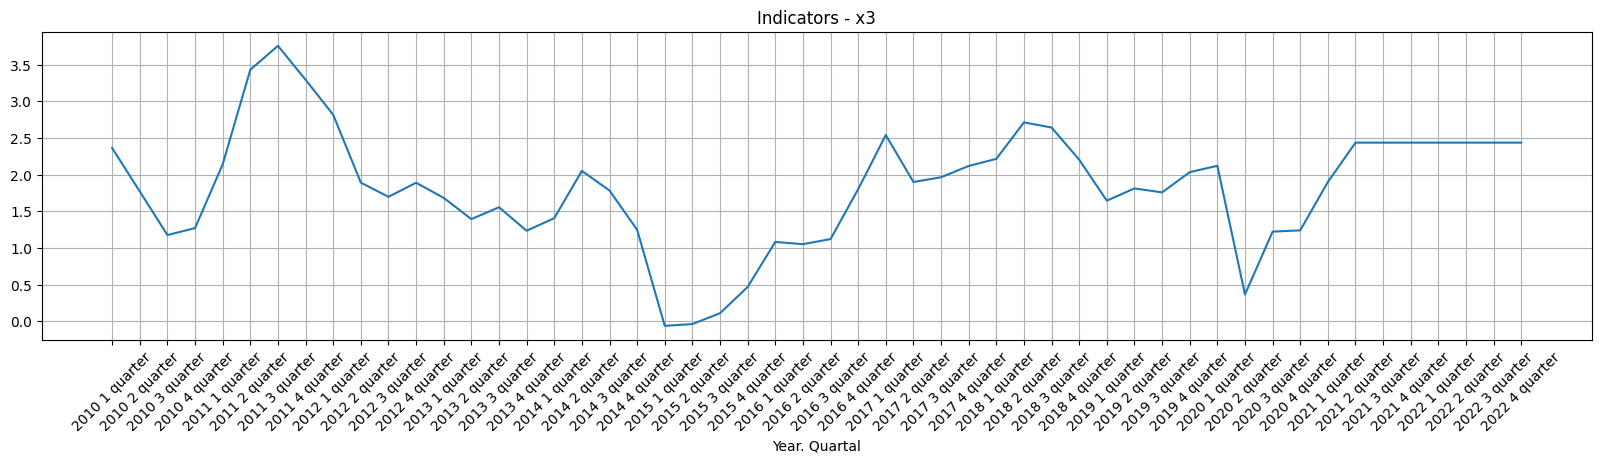

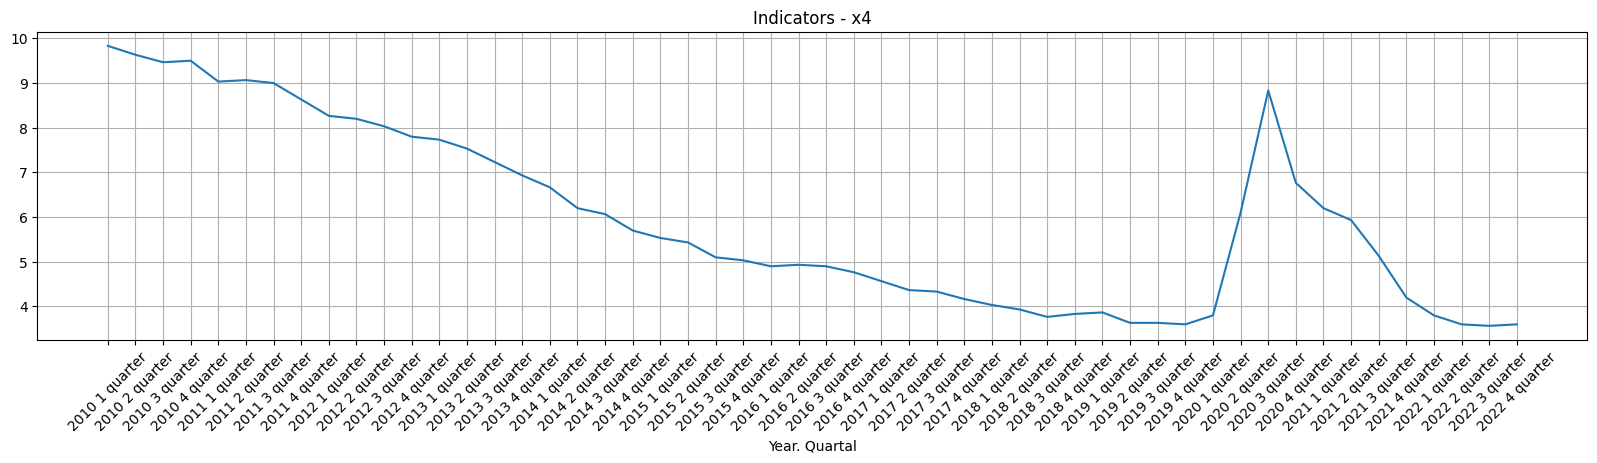

In [201]:
for i in new_indexes_from_matrix:
  if i in ['x3', 'x4']:
    fig, ax = plt.subplots(figsize=(20,4))
    plt.plot(x_without_sp500[i])
    plt.xlabel("Year. Quartal")
    plt.xticks(rotation=45)
    plt.title(f'Indicators - {i}')
    plt.grid()
    plt.show()

In [202]:
x_without_sp500 = sm.add_constant(x_without_sp500)
model = sm.OLS(y_sp500, x_without_sp500).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     283.8
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.92e-34
Time:                        01:50:38   Log-Likelihood:                -332.46
No. Observations:                  52   AIC:                             680.9
Df Residuals:                      44   BIC:                             696.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1695.4393   1382.524     -1.226      0.2

The old one with all variables was R-squared: 0.986, by removing bad factors and correcting outliers we get the new R-squared: 0.978, the coefficient has changed slightly, but our data no longer has unnecessary variables and outliers in the model, which can improve its quality.  

The model now looks like this: y^ = -1695.4393 + 50.3423x1 + 63.5314x3 + 19.7028x4 - 36.5762x5 - 8.6561x6 + 7.373e+04x7 + 9.3877x9

This Pet Project is devoted to econometric modeling of the dependence of the change in the US Federal Funds Rate on macroeconomic indicators. In the process of implementation we performed correlation analysis, modeling under multicollinearity and autocorrelation, robust statistical elimination of multicollinearity, replacement of the explained variable, analysis of the residuals of the model with heteroscedasticity and autocorrelation of the residuals, and subsequent correction.
Through these procedures, a better regression model was obtained after eliminating multicollinearity on atypical data.
Thus, the goals and objectives set at the beginning of the work were fully accomplished.